In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.spike_statistics import *
%matplotlib inline

In [2]:
def plot2d(data, xrange, yrange, emphasise_range=None, name="fr"):
    if emphasise_range is None:
        raise ValueError
    else:
        fig= plt.figure(figsize=(5, 3), dpi=300)
        ax = []
        ax.append(fig.add_axes([0.05, 0.1, 0.35, 0.8]))
        ax.append(fig.add_axes([0.5, 0.1, 0.35, 0.8]))
        ax.append(fig.add_axes([0.9, 0.25, 0.02, 0.5]))
    x, y = data.shape
    im = ax[0].imshow(data)  # norm=norm
    data = np.where(np.logical_and(data<=emphasise_range[1], data>=emphasise_range[0]), data, np.nan)
    ax[1].imshow(data)
    fig.colorbar(im, ax=[ax[0], ax[1]], cax=ax[2])
    for i in range(2):
        ax[i].grid(False)
        yticks = np.linspace(0, x, 4, endpoint=False, dtype=np.int8)
        ax[i].set_yticks(yticks)
        ax[i].set_yticklabels([f'{data:.1f}' for data in yrange[yticks]], rotation=60)
        xticks = np.linspace(0, y, 4, endpoint=False, dtype=np.int8)
        ax[i].invert_yaxis()
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels([f'{data:.1f}' for data in xrange[xticks]], )
    ax[0].set_ylabel(r"$AMPA$")
    ax[0].set_xlabel(r"$GABA_{A}$")
    ax[0].set_title(name)
    return fig

def arg_percentile(series, x):
    a, b = 0, 1
    while True:
        # m是a、b的终点
        m = (a+b)/2
        # 可以打印查看求解过程
        # print(np.percentile(series, 100*m), x)
        if np.percentile(series, 100*m) >= x:
            b = m
        elif np.percentile(series, 100*m) < x:
            a = m
        # 如果区间左右端点足够靠近，则退出循环。
        if np.abs(a-b) <= 0.000001:
            break
    return m


# mean fire rate in 4d sub submanifold

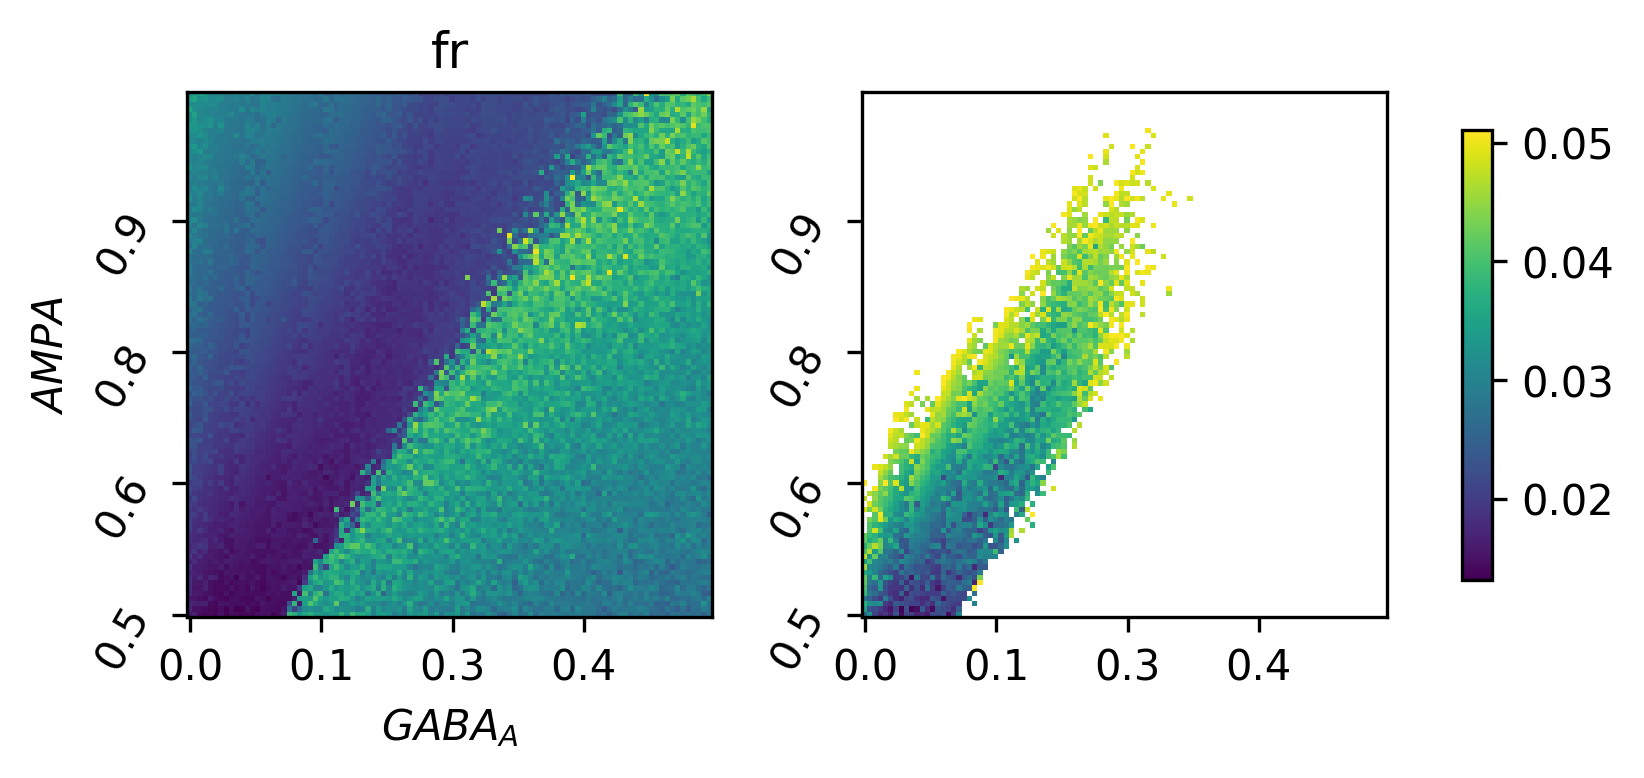

In [10]:
ampa_contribution = np.linspace(0.5, 1., num=100, endpoint=True)
gabaA_contribution = np.linspace(0., 0.5, num=100, endpoint=True)
file = np.load('../data/grid_search.npz')
mean_fr = file['mean_fr']
fig = plot2d(mean_fr, xrange=gabaA_contribution, yrange=ampa_contribution, name="fr", emphasise_range=(0.012, 0.02))

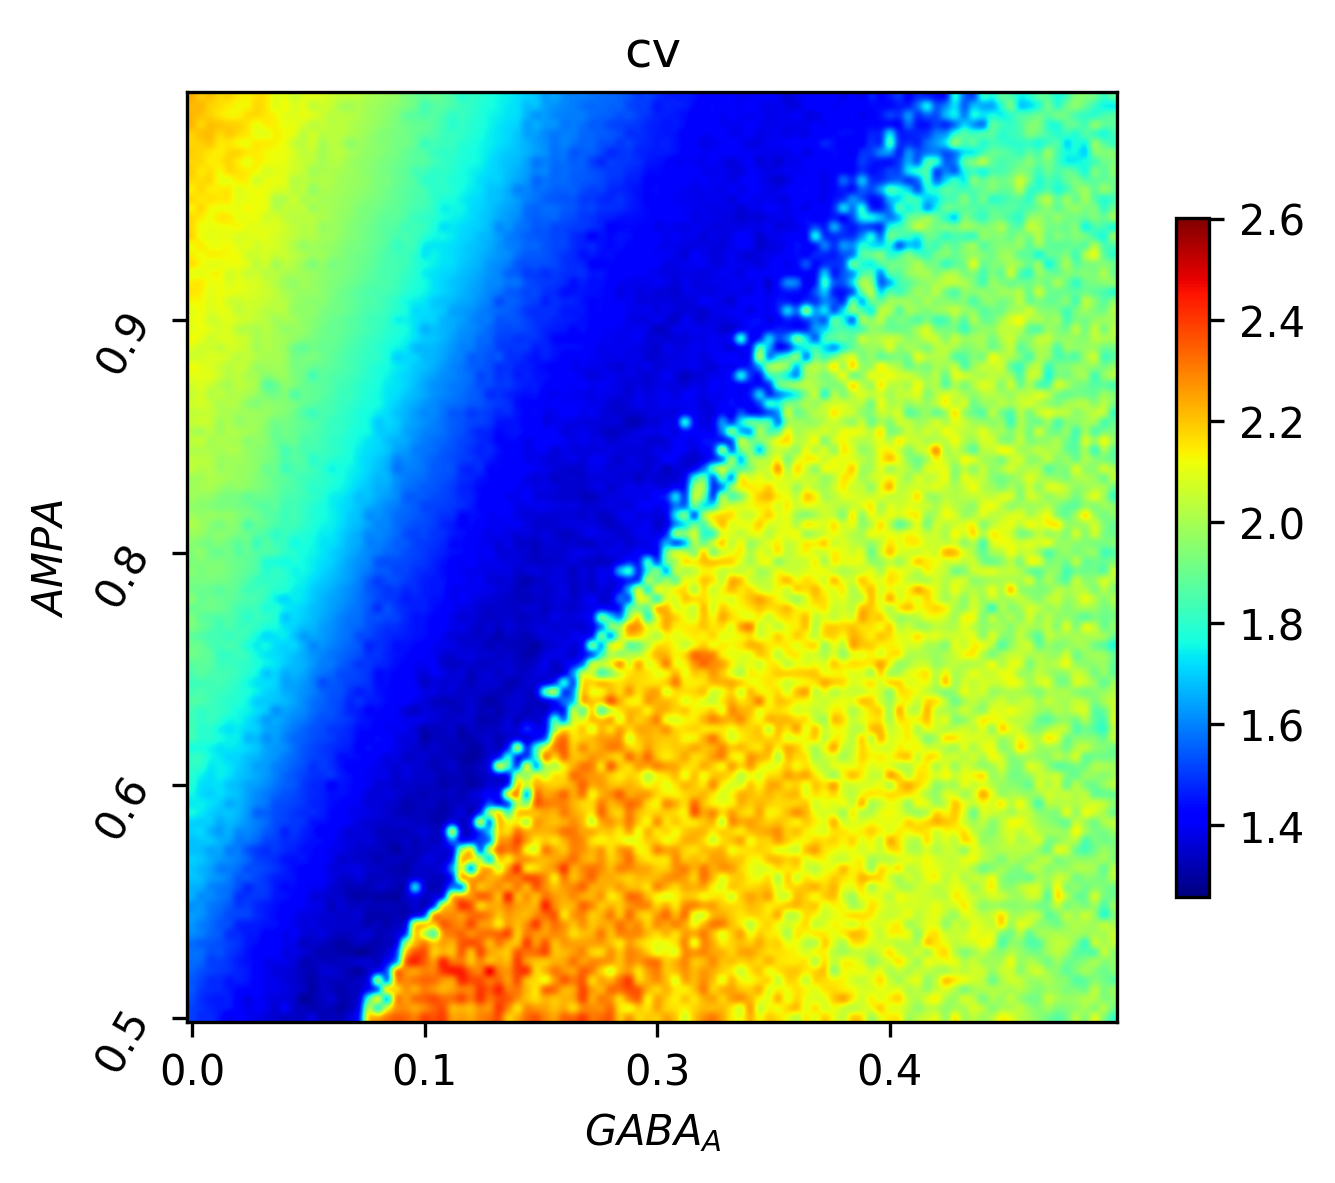

In [15]:
cv = file["cv"]
fig = plt.figure(figsize=(5, 5), dpi=300)
x, y = cv.shape
im = fig.gca().imshow(cv, cmap='jet', interpolation='gaussian')
fig.colorbar(im, ax=fig.gca(), shrink=0.6)
fig.gca().grid(False)
yticks = np.linspace(0, x, 4, endpoint=False, dtype=np.int8)
fig.gca().set_yticks(yticks)
fig.gca().set_yticklabels([f'{data:.1f}' for data in ampa_contribution[yticks]], rotation=60)
xticks = np.linspace(0, y, 4, endpoint=False, dtype=np.int8)
fig.gca().invert_yaxis()
fig.gca().set_xticks(xticks)
fig.gca().set_xticklabels([f'{data:.1f}' for data in gabaA_contribution[xticks]], )
fig.gca().set_ylabel(r"$AMPA$")
fig.gca().set_xlabel(r"$GABA_{A}$")
fig.gca().set_title("cv")
fig.savefig("./cv_heatmap.pdf")


# coherence coefficient

1. is in 0.48651981353759766
1.8 is in 0.5927343368530273


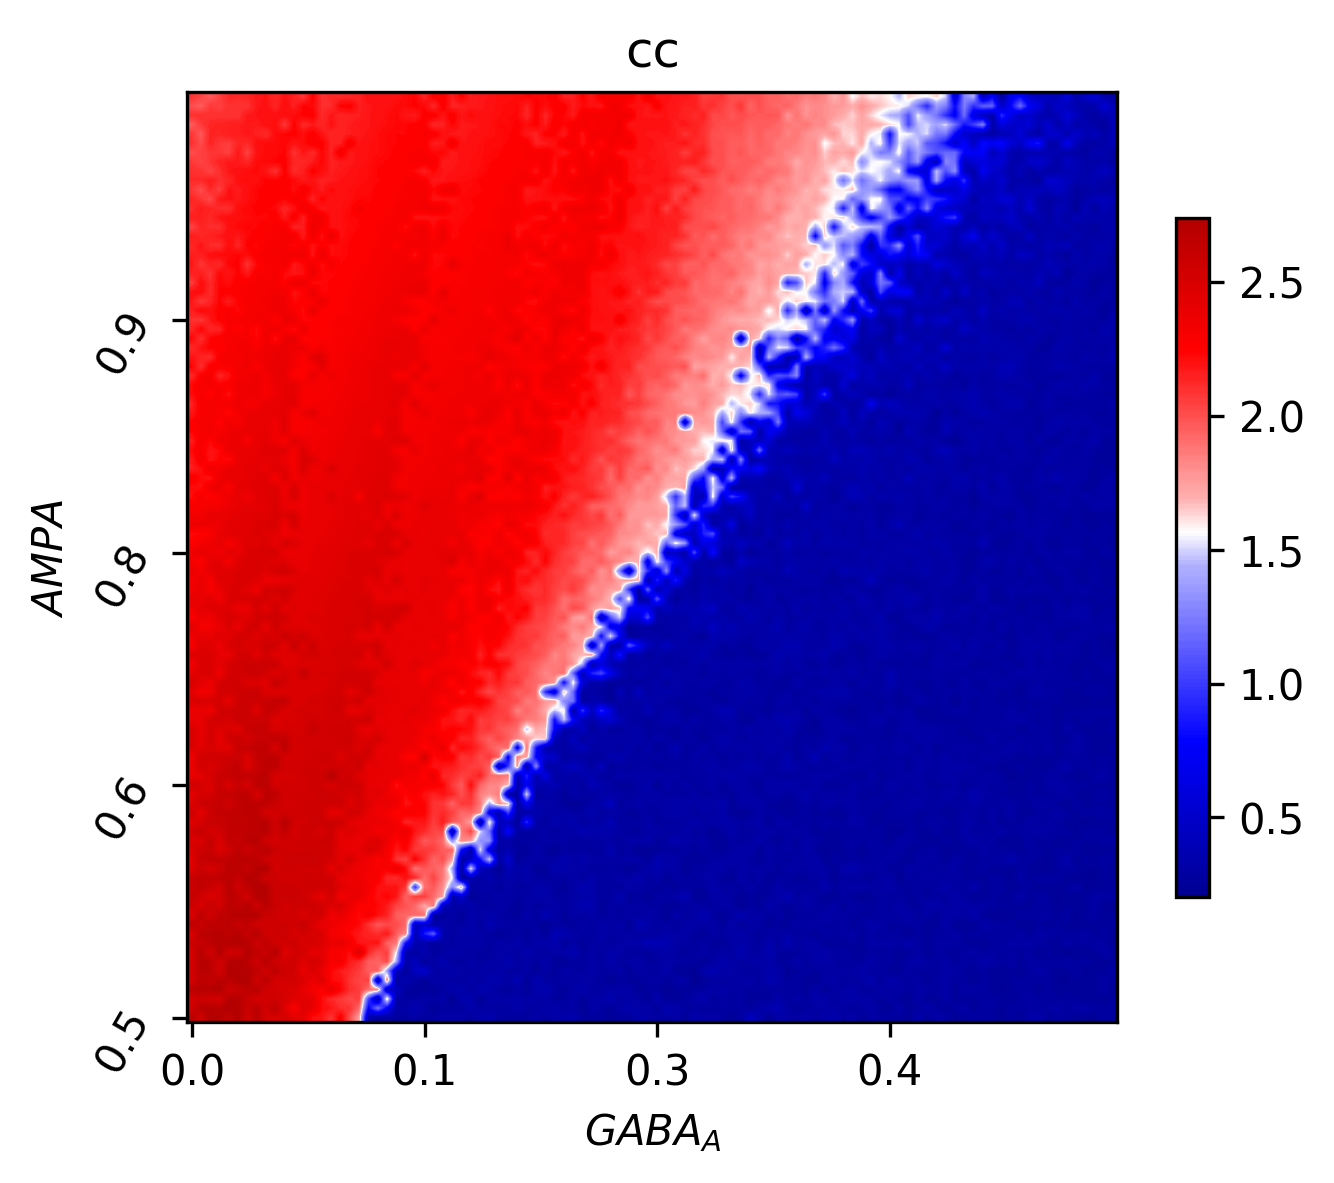

In [20]:
import matplotlib.colors as colors
cc = file['cc']
# fig = plot2d(cc, xrange=gabaA_contribution, yrange=ampa_contribution, name="cc", emphasise_range=(0.8, 1.8))
cc_data = cc.flatten()
percent1 = arg_percentile(cc_data, 1.)
percent2 = arg_percentile(cc_data, 2.0)
print("1. is in", percent1)
print("1.8 is in", percent2)
first = np.round(255*percent1).astype(np.int8)
second = np.round(255*(percent2 - percent1)).astype(np.int8)
third = 256 - first - second
#colors2 = new_cmap(np.linspace(0, 1, first))
colors1 = plt.cm.seismic(np.linspace(0.1, 0.42, first))
# colors2 = np.ones((second, 4), dtype=np.float64)
colors2 = plt.cm.seismic(np.linspace(0.42, 0.58, second))
colors3 = plt.cm.seismic(np.linspace(0.58, 0.9, third))
cols = np.vstack((colors1, colors2,colors3))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)
fig = plt.figure(figsize=(5, 5), dpi=300)
x, y = cc.shape
im = fig.gca().imshow(cc, cmap=mymap, interpolation="bilinear")
fig.colorbar(im, ax=fig.gca(), shrink=0.6)
fig.gca().grid(False)
yticks = np.linspace(0, x, 4, endpoint=False, dtype=np.int8)
fig.gca().set_yticks(yticks)
fig.gca().set_yticklabels([f'{data:.1f}' for data in ampa_contribution[yticks]], rotation=60)
xticks = np.linspace(0, y, 4, endpoint=False, dtype=np.int8)
fig.gca().invert_yaxis()
fig.gca().set_xticks(xticks)
fig.gca().set_xticklabels([f'{data:.1f}' for data in gabaA_contribution[xticks]], )
fig.gca().set_ylabel(r"$AMPA$")
fig.gca().set_xlabel(r"$GABA_{A}$")
fig.gca().set_title("cc")
fig.savefig("cc_heatmap.pdf")


# ks distance

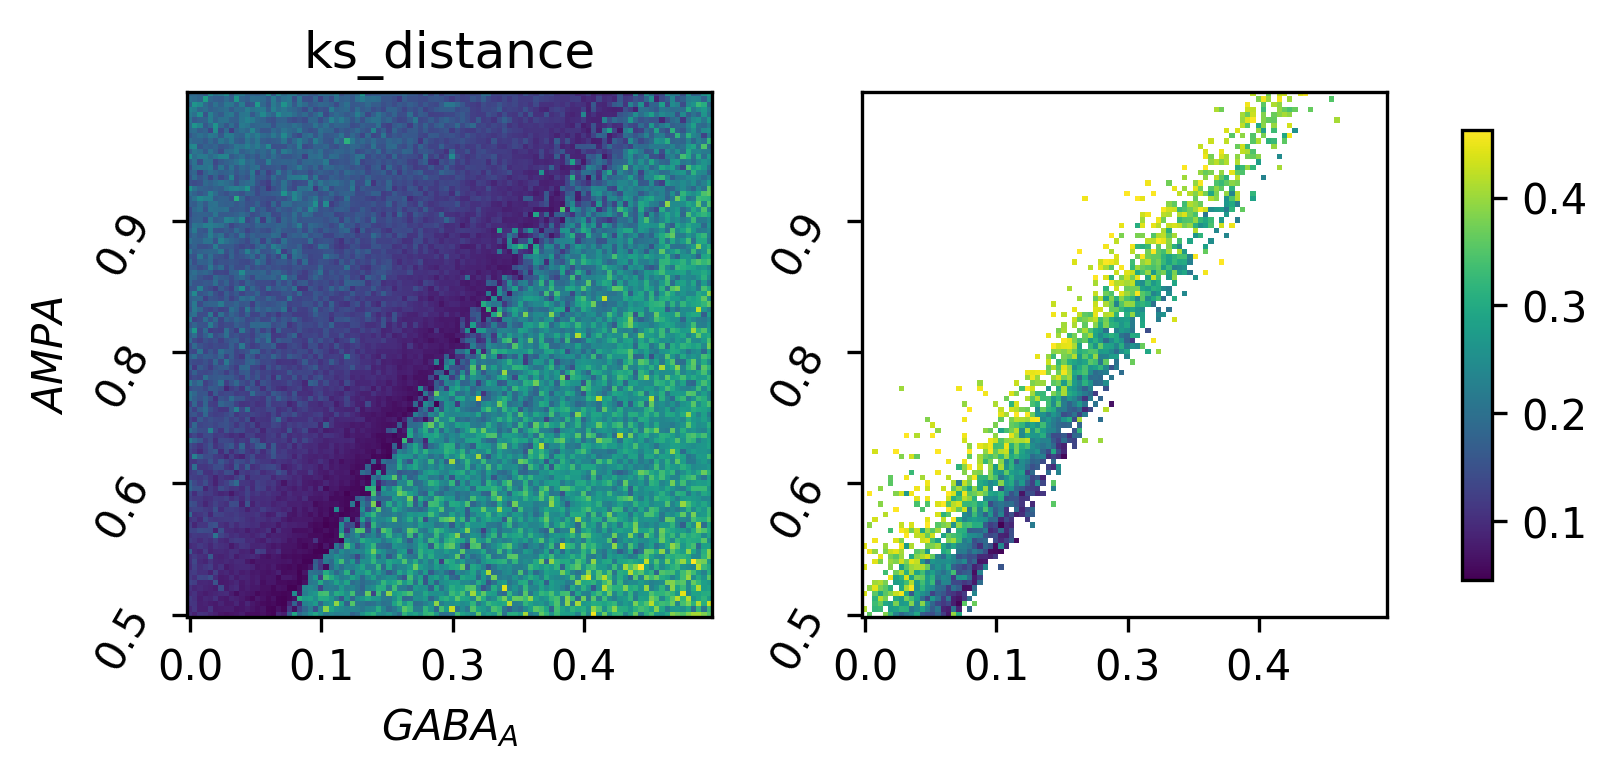

In [6]:
ks = file['ks']
fig = plot2d(ks, xrange=gabaA_contribution, yrange=ampa_contribution, name="ks_distance", emphasise_range=(0., 0.1))

In [29]:
ks = file['ks']
# fig = plot2d(cc, xrange=gabaA_contribution, yrange=ampa_contribution, name="cc", emphasise_range=(0.8, 1.8))
cc_data = cc.flatten()
percent1 = arg_percentile(cc_data, 0.5)
percent2 = arg_percentile(cc_data, 1.8)
print("1. is in", percent1)
print("1.8 is in", percent2)
first = np.round(255*percent1).astype(np.int8)
second = np.round(255*(percent2 - percent1)).astype(np.int8)
third = 256 - first - second
#colors2 = new_cmap(np.linspace(0, 1, first))
colors1 = plt.cm.bwr(np.linspace(0.1, 0.42, first))
# colors2 = np.ones((second, 4), dtype=np.float64)
colors2 = plt.cm.bwr(np.linspace(0.42, 0.58, second))
colors3 = plt.cm.bwr(np.linspace(0.58, 0.9, third))
cols = np.vstack((colors1, colors2,colors3))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)
fig = plt.figure(figsize=(5, 5), dpi=300)
x, y = cc.shape
im = fig.gca().imshow(cc, cmap=mymap, interpolation="bilinear")
fig.colorbar(im, ax=fig.gca(), shrink=0.6)
fig.gca().grid(False)
yticks = np.linspace(0, x, 4, endpoint=False, dtype=np.int8)
fig.gca().set_yticks(yticks)
fig.gca().set_yticklabels([f'{data:.1f}' for data in ampa_contribution[yticks]], rotation=60)
xticks = np.linspace(0, y, 4, endpoint=False, dtype=np.int8)
fig.gca().invert_yaxis()
fig.gca().set_xticks(xticks)
fig.gca().set_xticklabels([f'{data:.1f}' for data in gabaA_contribution[xticks]], )
fig.gca().set_ylabel(r"$AMPA$")
fig.gca().set_xlabel(r"$GABA_{A}$")
fig.gca().set_title("cc")

NameError: name 'file' is not defined

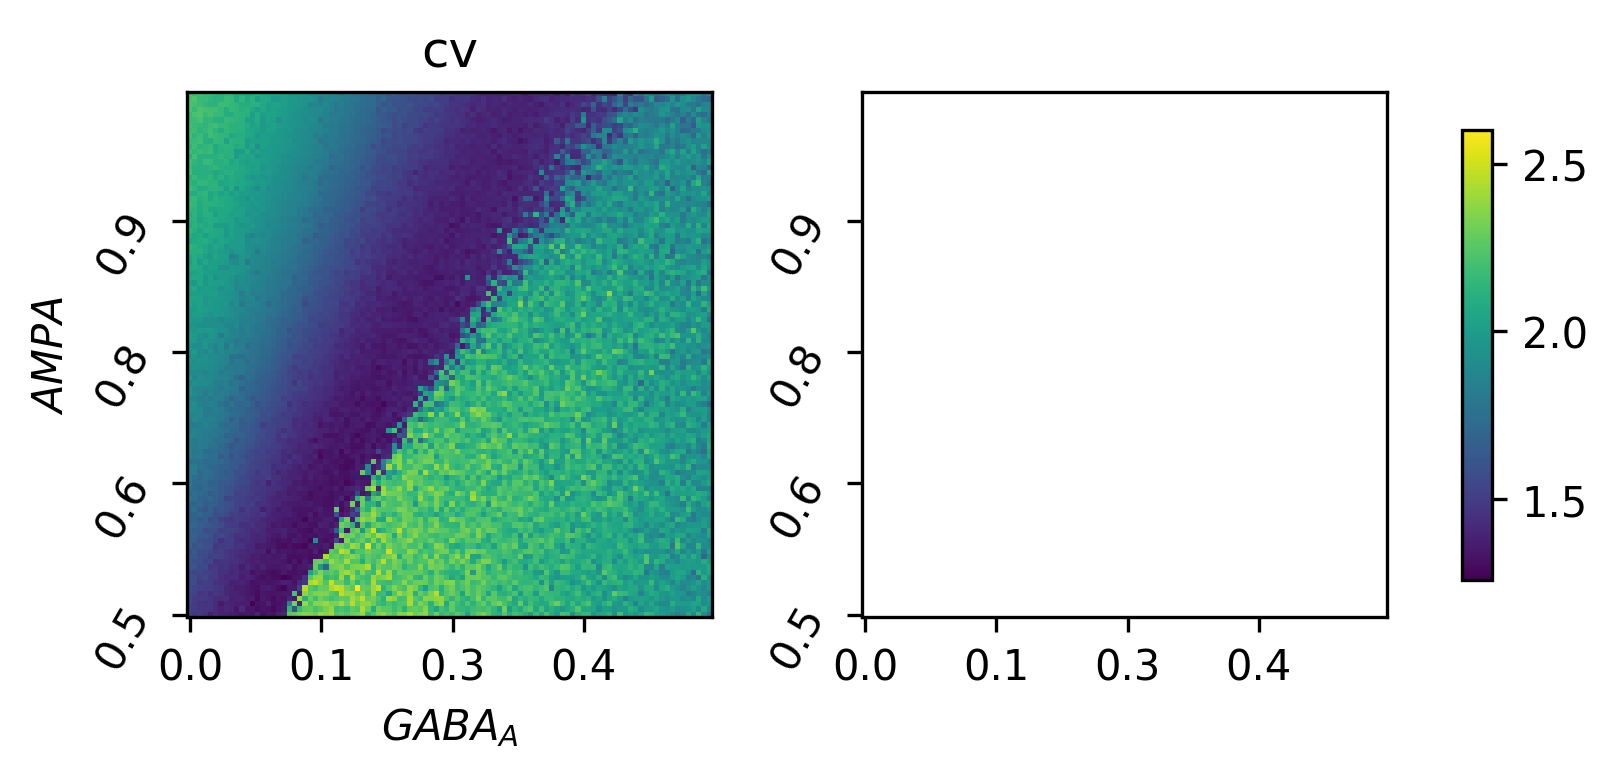

In [5]:
cv = file["cv"]
fig = plot2d(cv, xrange=gabaA_contribution, yrange=ampa_contribution, name="cv", emphasise_range=(1., 1.2))

# specific spike raster

In [11]:
# ks_min = np.sort(ks.flatten())[:5]
# print(f"some minimal ks distance is {ks_min}")
# index = map(lambda x: (x//100, x%100), ks_min_index)
ampa_contribution = np.linspace(0.5, 1, num=100, endpoint=True)
gabaA_contribution = np.linspace(0., 0.5, num=100, endpoint=True)
contribution = np.stack(np.meshgrid(ampa_contribution, gabaA_contribution, indexing='ij'), axis=-1).reshape((-1, 2))
ampa_contribution = contribution[:, 0]
gabaA_contribution = contribution[:, 1]
ampa = ampa_contribution / 34
nmda = (1 - ampa_contribution) / 250
gabaA = gabaA_contribution / 2
gabaB = (1 - gabaA_contribution) / 36
para =np.stack([ampa, nmda, gabaA, gabaB], axis=1)

ks_min_some_index = np.argsort(ks.reshape(-1))[:5]
specific_gui = para[ks_min_some_index[0]]

#       34 * ampa + 250 * nmda = 1
#       2 * gabaA + 36 * gabaB = 1
def e_func(x):
    return (1-34 * x) / 250
def i_func(x):
    return (1 - 2* x) / 36
fig = plt.figure(figsize=(5, 5), dpi=200)
ampa_space = np.linspace(0, 1/34, num=50)
gabaA_space = np.linspace(0., 0.5, num=50)
ax = fig.gca()
ax.plot(ampa_space, e_func(ampa_space), c="k", lw=1)
ax.plot(ampa[ks_min_some_index], nmda[ks_min_some_index], "o")
ax.plot(gabaA_space, i_func(gabaA_space), c="r", lw=1)
ax.plot(gabaA[ks_min_some_index], gabaB[ks_min_some_index], ">")
ax.set_aspect(1)


NameError: name 'ks' is not defined

In [44]:
import torch
from brain_block.random_initialize import connect_for_block
from brain_block.block import block
from analysis.spike_statistics import instantaneous_rate
from scipy.ndimage import gaussian_filter1d
property, w_uij = connect_for_block("../data/small_block/small_block/single")
print(property[0, [10, 11, 12, 13]])
specific_gui = torch.tensor([0.02000000000, 0.00043232323232323246, 0.16830848484848485, 0.018471969696969695])
ampa_contribution = np.linspace(0.5, 1, num=100, endpoint=True)
gabaA_contribution = np.linspace(0., 0.5, num=100, endpoint=True)
contribution = np.stack(np.meshgrid(ampa_contribution, gabaA_contribution, indexing='ij'), axis=-1).reshape((-1, 2))
ampa_contribution = contribution[:, 0]
gabaA_contribution = contribution[:, 1]
ampa = ampa_contribution / 34
nmda = (1 - ampa_contribution) / 250
gabaA = gabaA_contribution / 2
gabaB = (1 - gabaA_contribution) / 36
para =np.stack([ampa, nmda, gabaA, gabaB], axis=1)
# specific_gui = para[60*100+80]
print(specific_gui)
# property[:, (10, 11, 12, 13)] = torch.from_numpy(specific_gui.astype(np.float32))
property[:, (10, 11, 12, 13)] = specific_gui
# assign specific gui
property = property.cuda()
w_uij = w_uij.cuda()
B = block(
    node_property=property,
    w_uij=w_uij,
    delta_t=0.1,
)
log_all = []
synaptic_current = []
for time in range(30000):
    print(time, end='\r')
    B.run(noise_rate=0.0003, isolated=False)
    if time >= 10000:
        synaptic_current.append(B.I_ui[:, 1500].cpu().numpy())
        log_all.append(B.active.data.cpu().numpy())
synaptic_current = np.array(synaptic_current)
log_all = np.array(log_all, dtype=np.uint8)
log = log_all[:, 1400:1650]
log = log.reshape((-1, 10, 250))
log = log.sum(axis=1)
# np.save("subcritical_spike.npy", log)
print("log.max", log.max())
# fr = instantaneous_rate(sub_log, bin_width=5)
# rate_time_series_auto_kernel = gaussian_filter1d(fr, 20, axis=-1)
torch.cuda.empty_cache()

torch.Size([2000, 22]) torch.Size([4, 2000, 2000])
tensor([0.0115, 0.0020, 0.2517, 0.0111])
tensor([0.0200, 0.0004, 0.1683, 0.0185])
log.max 1


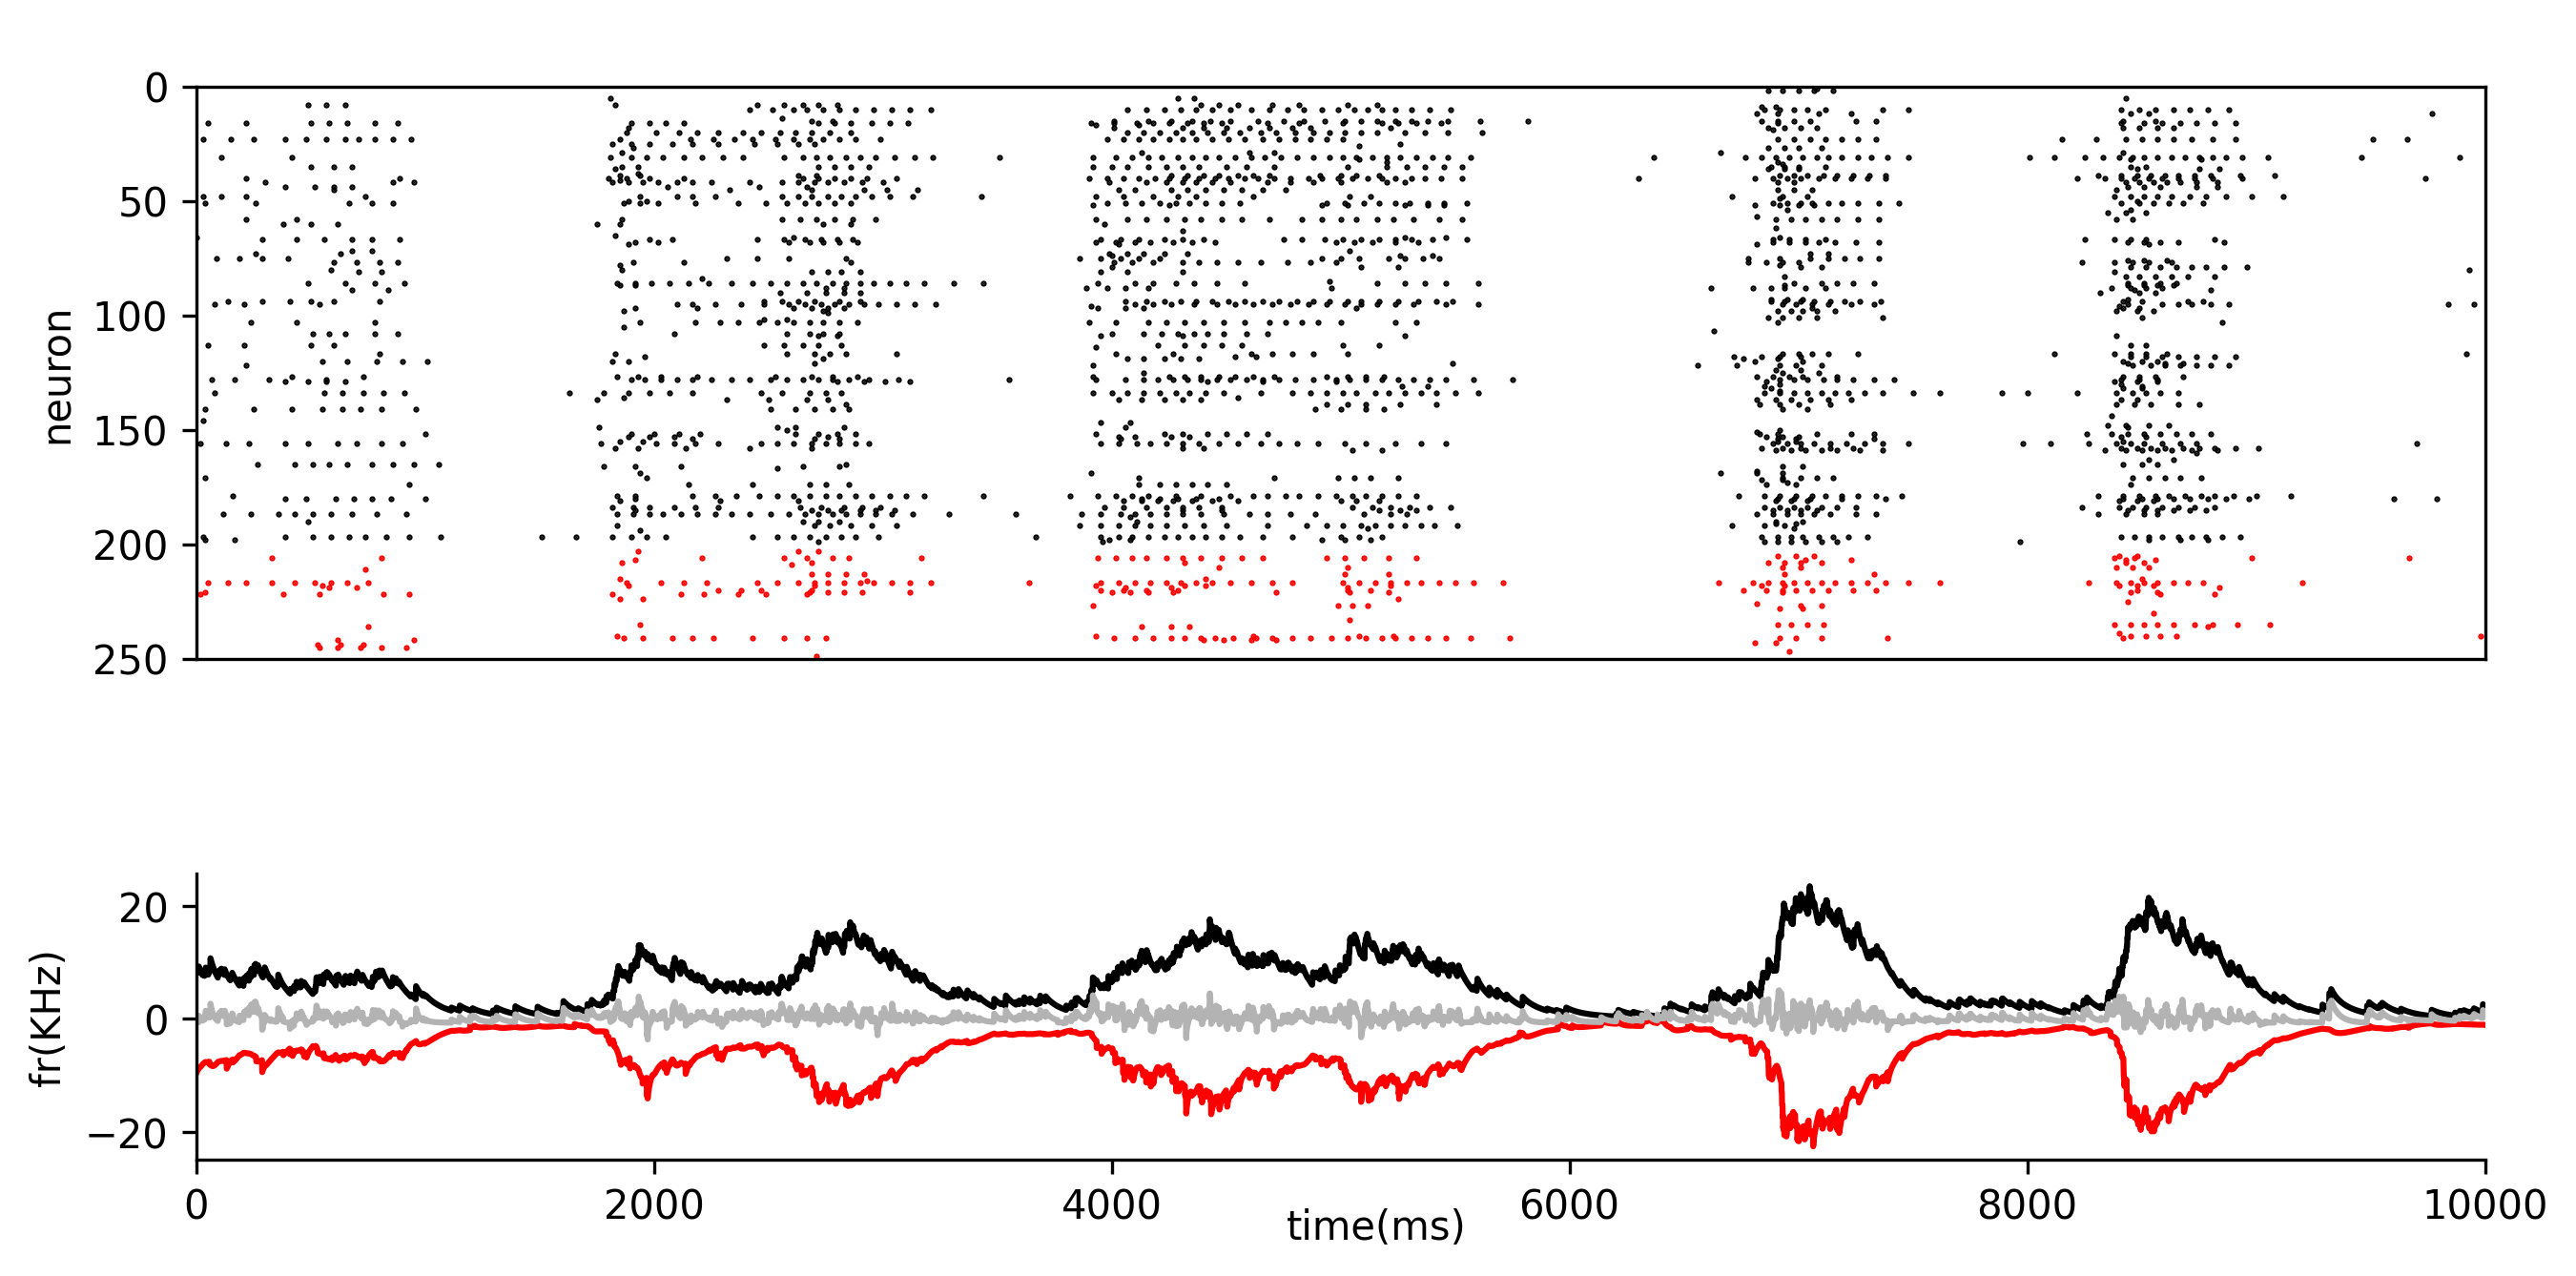

In [48]:
sub_log = log[-1000:, ]
synaptic_current = synaptic_current[-10000:, ]
fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(1, 1, 1, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_xlabel('time(ms)')
ax = fig.add_axes([0.1, 0.4, 0.8, 0.5])
x, y = sub_log[:, :200].nonzero()
ax.scatter(x, y, marker='.', color="black", s=1)
x, y = sub_log[:, 200:].nonzero()
ax.scatter(x, y + 200, marker='.', color="red", s=1)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 250])
ax.set_xticks([])
ax.set_ylabel('neuron')
ax.invert_yaxis()
ax.set_aspect(1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.2])
ax.plot(synaptic_current[:, :2].sum(axis=1), color='k')
ax.plot(synaptic_current[:, 2:].sum(axis=1), color='red')
ax.plot(synaptic_current[:, :].sum(axis=1), color='0.7')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlim([0, 10000])
ax.set_ylabel("fr(KHz)")
fig.savefig("critical_raster.pdf")

log (9000, 250)


Text(0, 0.5, 'PSD [v**2/hZ]')

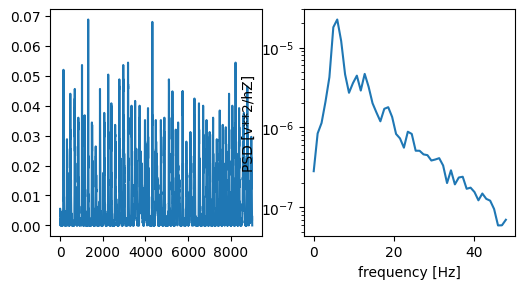

In [9]:
# spike spectrum
print("log", log.shape)
ins_fr = instantaneous_rate(log)
fig = plt.figure(figsize=(6, 3), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(ins_fr)
freqs, psd = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1024, noverlap=800)
ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogy(freqs[:50], psd[:50])
# ax2.set_ylim([0.5e-7, 1e-4])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [v**2/hZ]')

log (9000, 250)


Text(0.5, 1.0, 'subcritical')

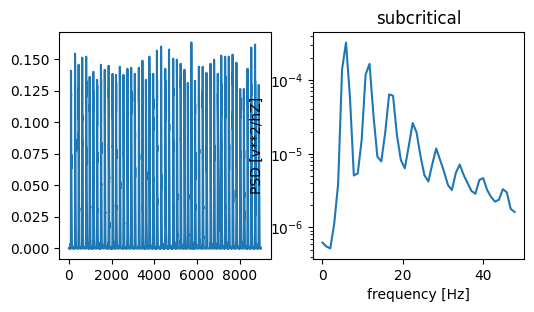

In [14]:
print("log", log.shape)
ins_fr = instantaneous_rate(log)
fig = plt.figure(figsize=(6, 3), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(ins_fr)
freqs, psd = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1024, noverlap=800)
ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogy(freqs[:50], psd[:50])
# ax2.set_ylim([0.5e-7, 1e-4])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [v**2/hZ]')
ax2.set_title("subcritical")

log (9000, 250)


Text(0.5, 1.0, 'subcritical')

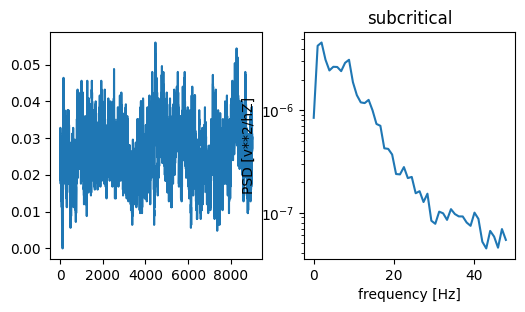

In [17]:
print("log", log.shape)
ins_fr = instantaneous_rate(log)
fig = plt.figure(figsize=(6, 3), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(ins_fr)
freqs, psd = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1024, noverlap=800)
ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogy(freqs[:50], psd[:50])
# ax2.set_ylim([0.5e-7, 1e-4])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [v**2/hZ]')
ax2.set_title("subcritical")

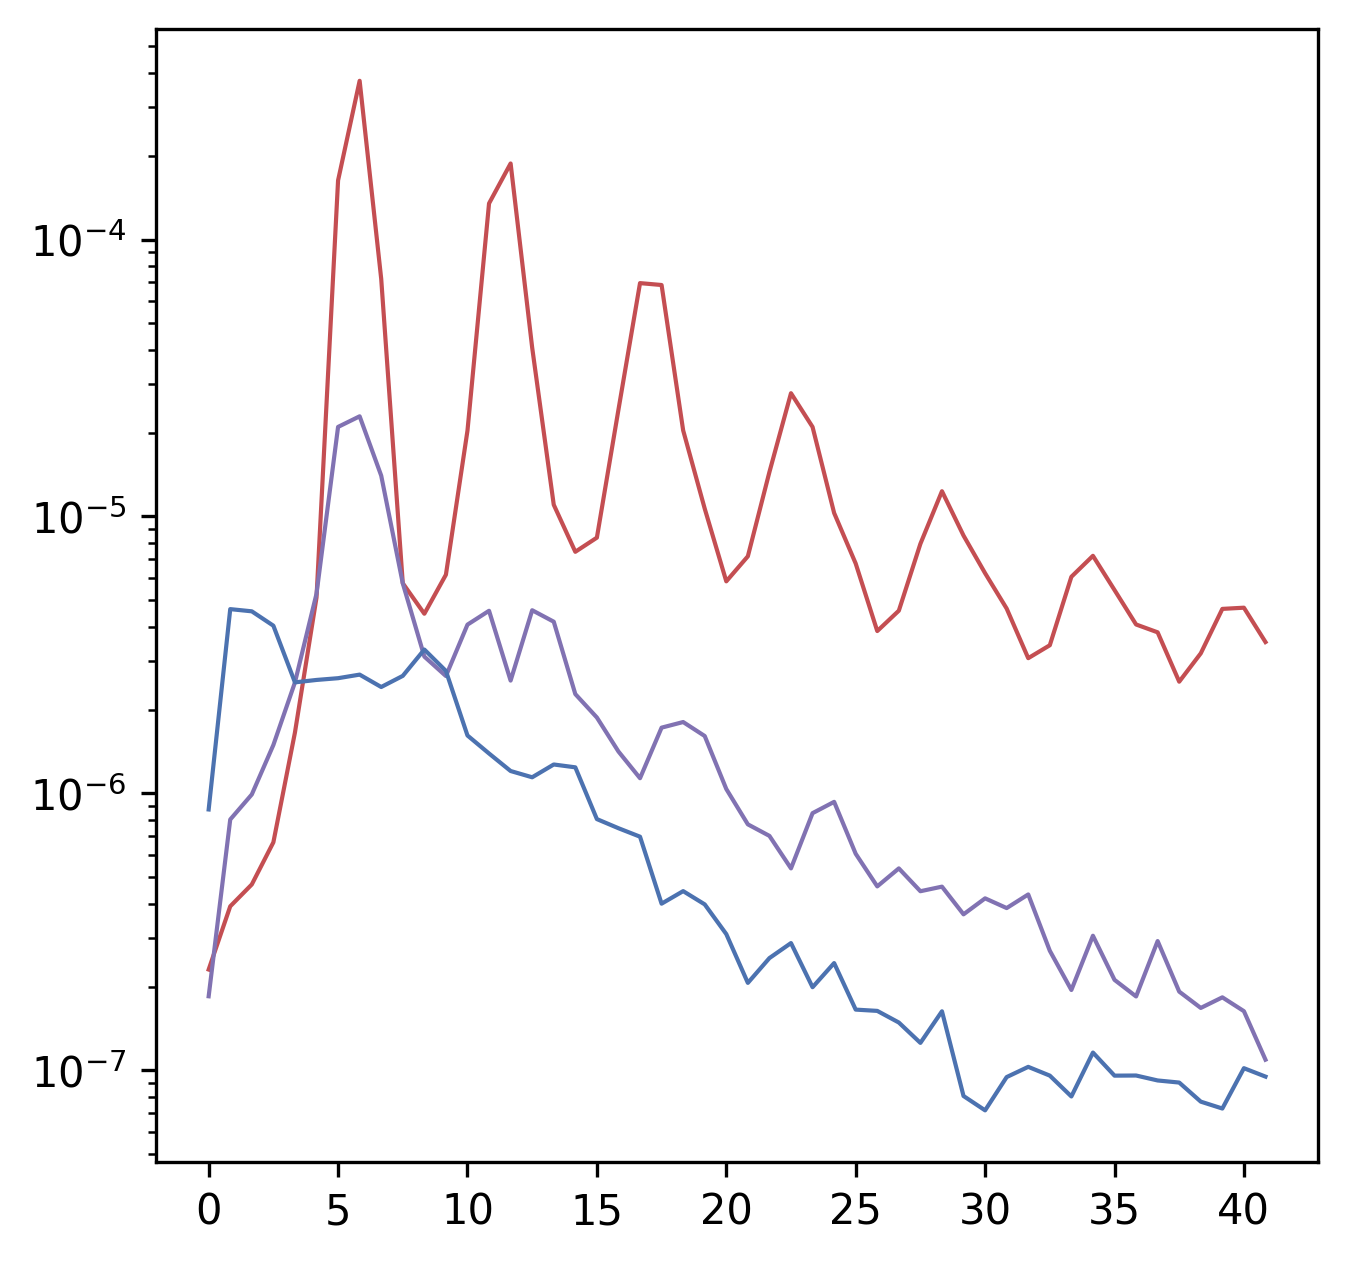

In [3]:
super_spike = np.load("supercritical_spike.npy")
sub_spike = np.load("subcritical_spike.npy")
critical_spike = np.load("critical_spike.npy")
ins_fr = instantaneous_rate(super_spike)
freqs1, psd1 = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1200, noverlap=800)
ins_fr = instantaneous_rate(critical_spike)
freqs2, psd2 = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1200, noverlap=800)
ins_fr = instantaneous_rate(sub_spike)
freqs3, psd3 = welch(ins_fr, 1000, return_onesided=True, scaling='density', nperseg=1200, noverlap=800)
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()
ax.semilogy(freqs1[:50], psd1[:50], lw=1., c=u'#c44e52')
ax.semilogy(freqs2[:50], psd2[:50], lw=1, c=u'#8172b2')
ax.semilogy(freqs3[:50], psd3[:50], lw=1, c=u'#4c72b0')
# fig.savefig("spike_spectrum.eps")

superspike| spike shape (9000, 250)
threshold, 3.0
aval_size 1 818
aval_dur 1 56


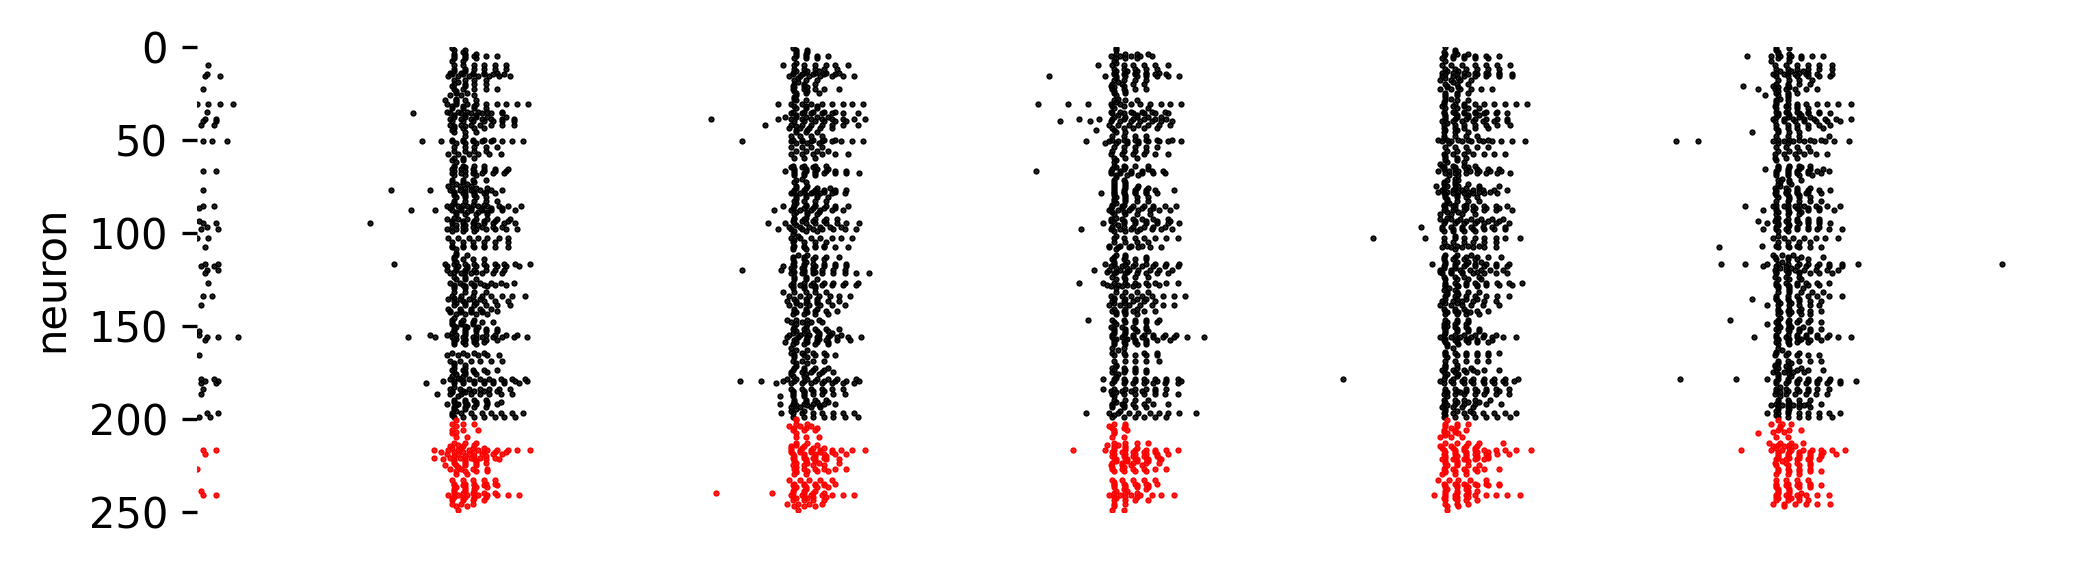

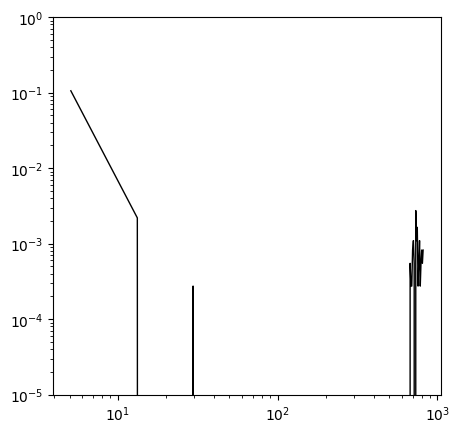

In [37]:
from analysis.avalanches import *
print("superspike| spike shape", super_spike.shape)
fig = plt.figure(figsize=(8, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, frameon=False)
x, y = super_spike[-2000:, :200].nonzero()
ax.scatter(x, y, marker='.', color="black", s=1)
x, y = super_spike[-2000:, 200:].nonzero()
ax.scatter(x, y + 200, marker='.', color="red", s=1)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 250])
ax.set_xticks([])
ax.set_ylabel('neuron')
ax.invert_yaxis()
ax.set_aspect(1)

threshold = np.median(np.sum(super_spike, axis=1)) / 2
print("threshold," ,threshold)
_, aval_size, aval_dur, _ = compute_avalanche(super_spike, None)
print("aval_size", aval_size.min(), aval_size.max())
print("aval_dur", aval_dur.min(), aval_dur.max())
hist, edges = np.histogram(aval_size, bins=100, density=True)
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.gca()
ax.plot((edges[:-1]+edges[1:])/2, hist, "k", lw=1)
ax.set_ylim([1e-5, 1])
ax.set_xscale('log')
ax.set_yscale('log')

threshold, 0.0


Text(0, 0.5, 'prob')

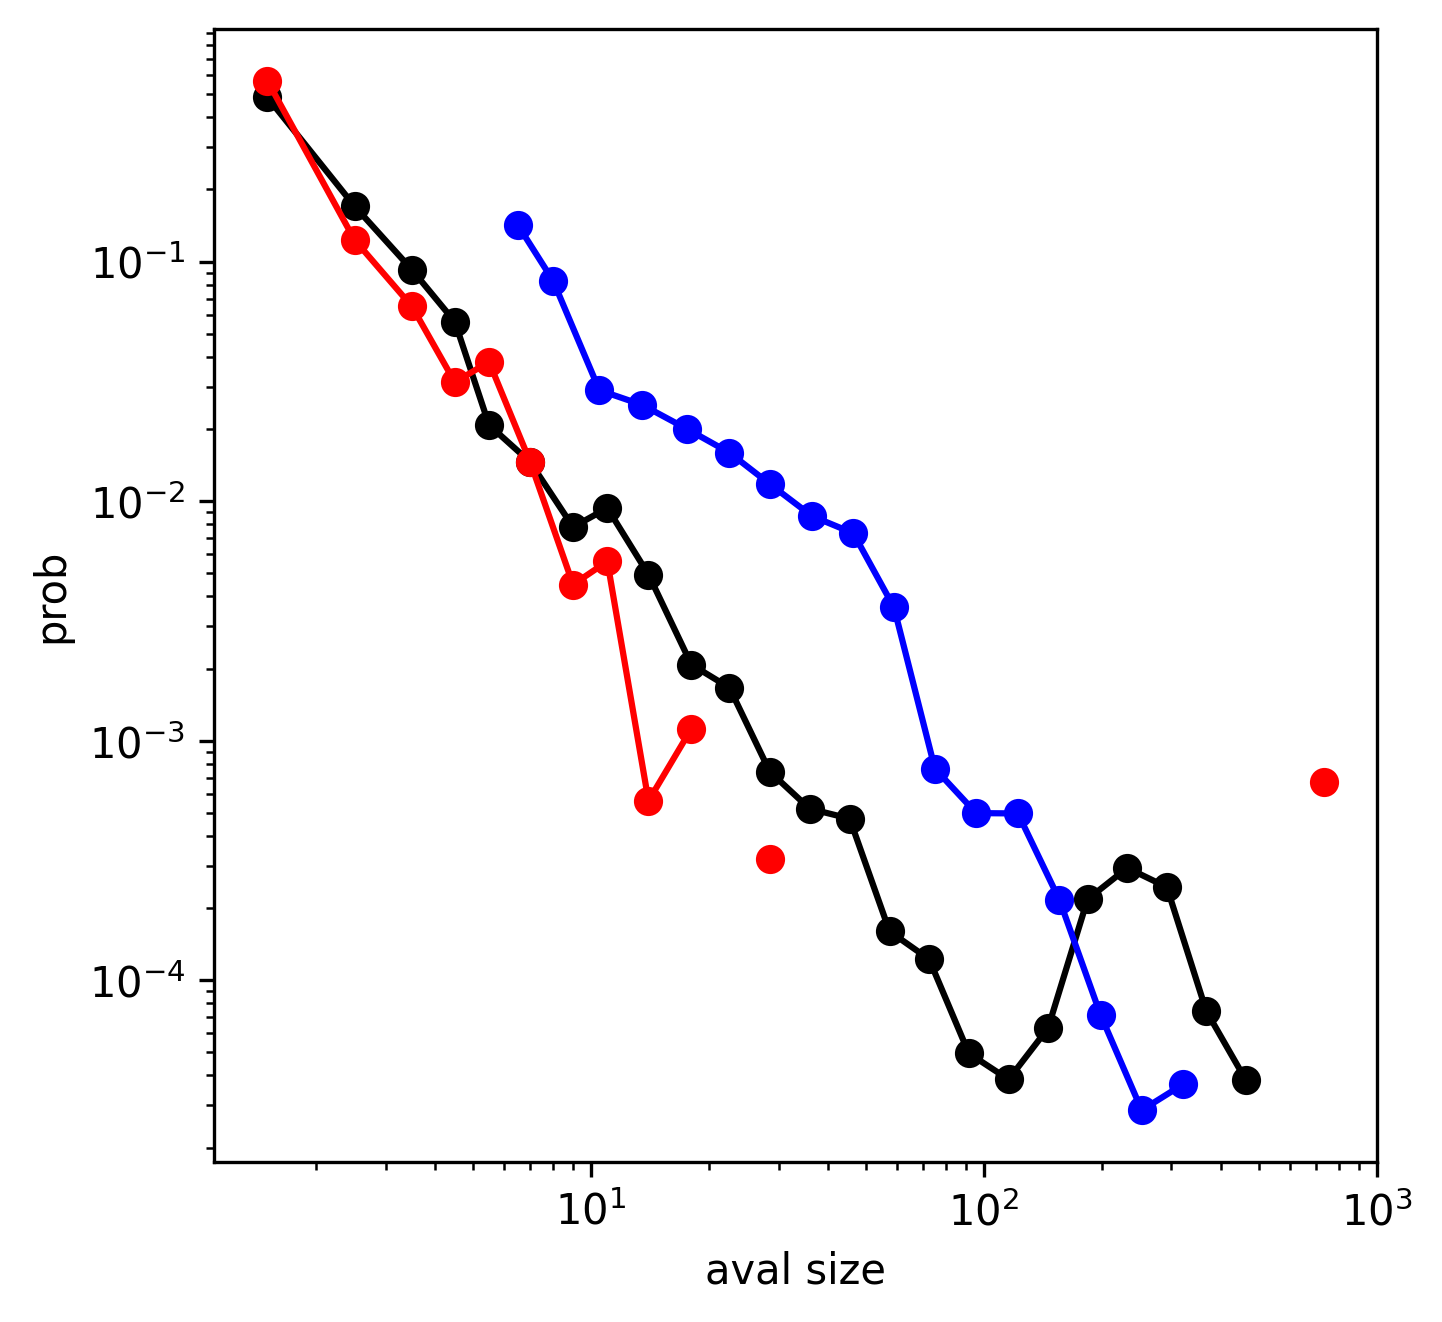

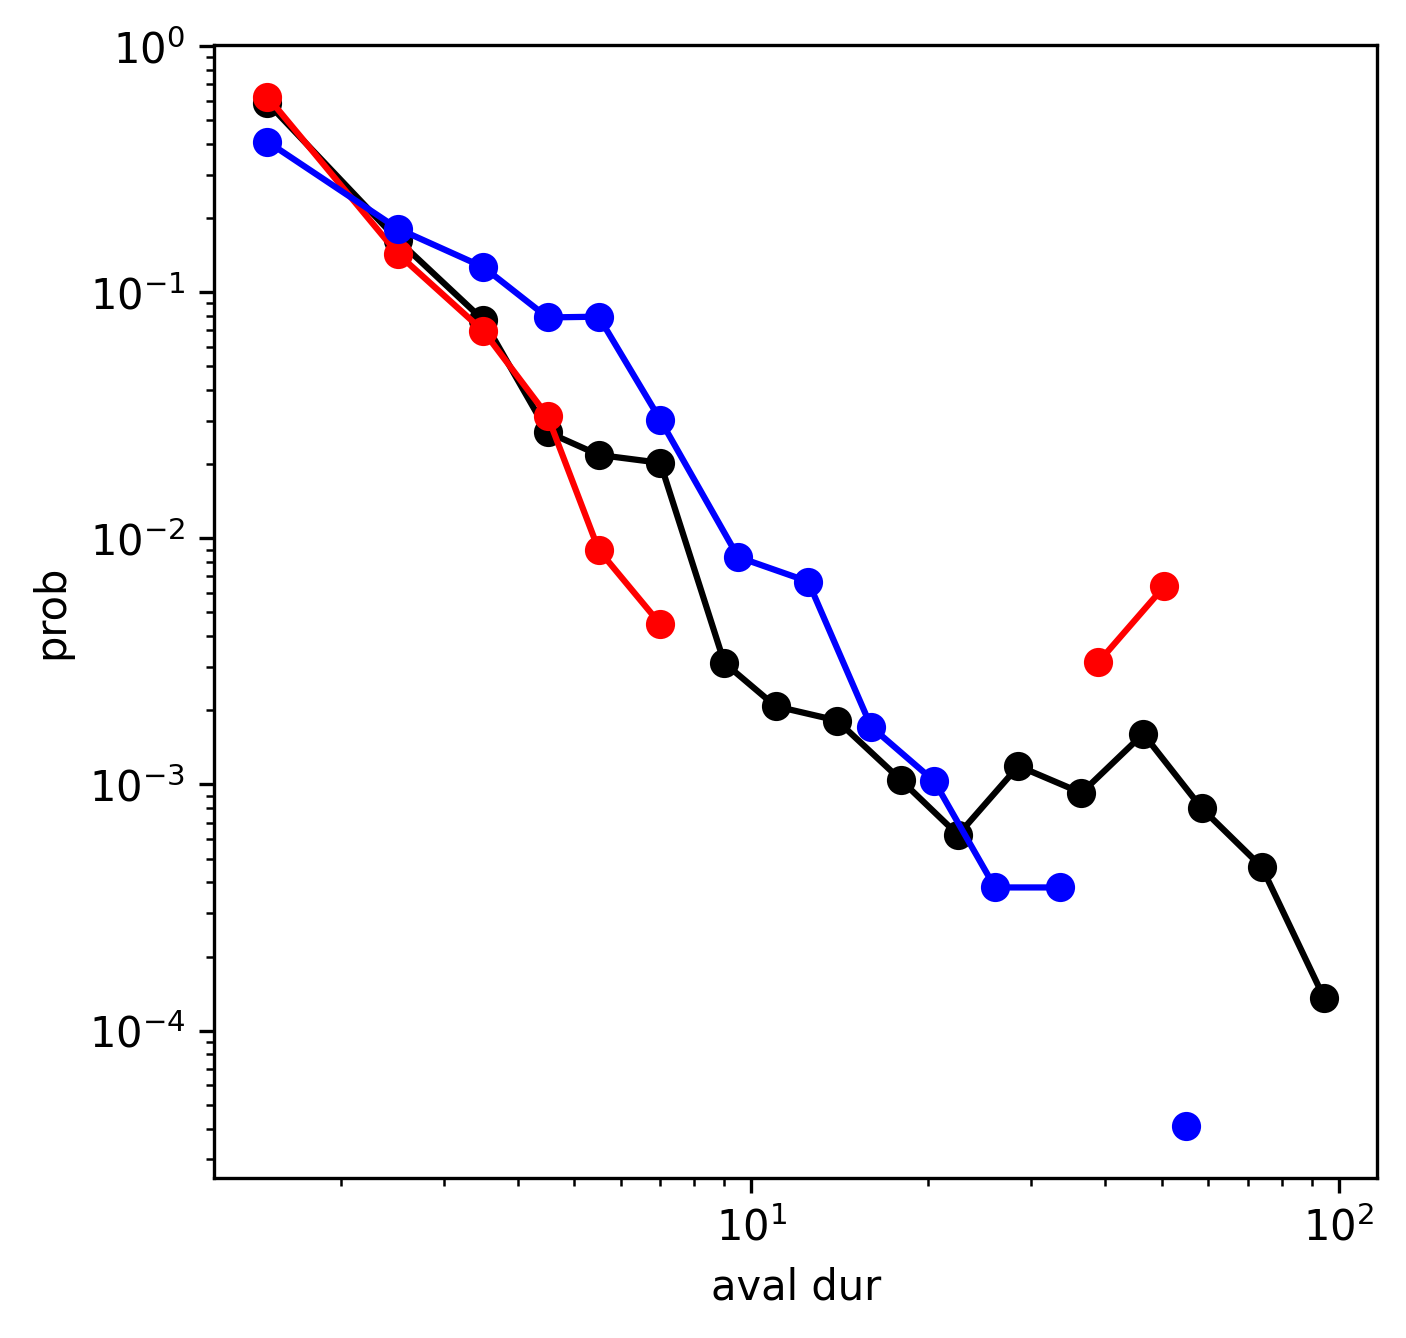

In [43]:
from analysis.avalanches import *
fig1 = plt.figure(figsize=(5, 5), dpi=300)
ax1 = fig1.gca()
fig2 = plt.figure(figsize=(5, 5), dpi=300)
ax2 = fig2.gca()
_, aval_size, aval_dur, _ = compute_avalanche(critical_spike)
fit = powerlaw.Fit(aval_size, xmin=aval_size.min(), xmax=aval_size.max())
fit.plot_pdf(ax=ax1, original_data=True, c="k", marker='o', linestyle='-')
fit = powerlaw.Fit(aval_dur, xmin=aval_dur.min(), xmax=aval_dur.max())
fit.plot_pdf(ax=ax2, original_data=True, c="k", marker='o', linestyle='-')

threshold = np.median(np.sum(super_spike, axis=1)) / 2
print("threshold," ,threshold)
_, aval_size, aval_dur, _ = compute_avalanche(super_spike, threshold=1)
fit = powerlaw.Fit(aval_size, xmin=aval_size.min(), xmax=aval_size.max())
fit.plot_pdf(ax=ax1, original_data=True,  c="r", marker='o', linestyle='-')
fit = powerlaw.Fit(aval_dur, xmin=aval_dur.min(), xmax=aval_dur.max())
fit.plot_pdf(ax=ax2, original_data=True, c="r", marker='o', linestyle='-')

_, aval_size, aval_dur, _ = compute_avalanche(sub_spike, threshold=6)
fit = powerlaw.Fit(aval_size, xmin=aval_size.min(), xmax=400)
fit.plot_pdf(ax=ax1, original_data=False, c="b", marker='o', linestyle='-')
fit = powerlaw.Fit(aval_dur, xmin=aval_dur.min(), xmax=100)
fit.plot_pdf(ax=ax2, original_data=False, c="b", marker='o', linestyle='-')
ax1.set_xlabel("aval size")
ax1.set_ylabel("prob")

ax2.set_xlabel("aval dur")
ax2.set_ylabel("prob")


# synapse filtering

[  1  32 219 263 414 459 599 613 647 695 838 973 996]


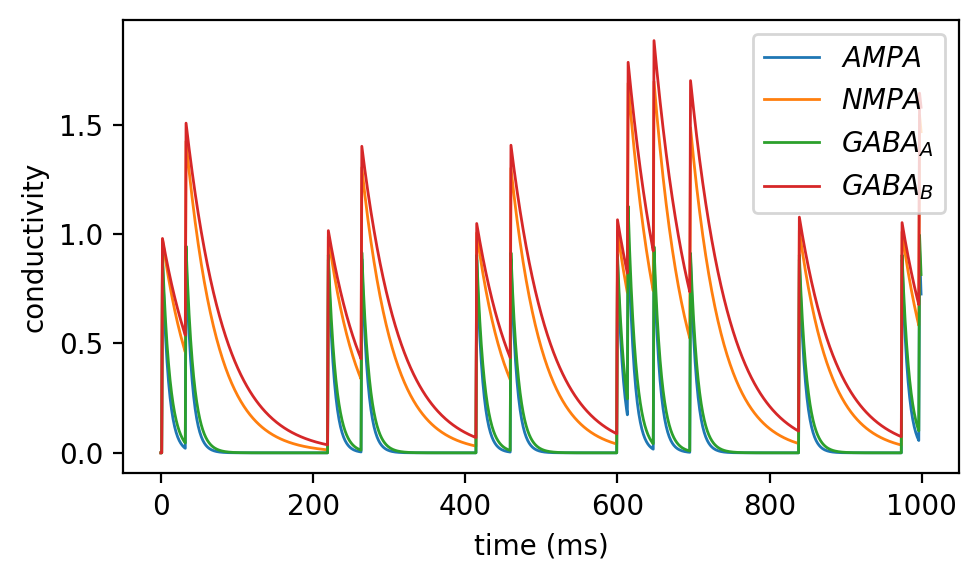

In [20]:
tau_ui = (8, 40, 10, 50)
synapse_name = ['$AMPA$', '$NMPA$', '$GABA_{A}$', '$GABA_{B}$']

noise = 20 / 1000
spike_time = np.where(np.random.rand(1000) < noise)[0]
print(spike_time)

def _func(time, spike_time, tau, g=1.):
    out = []
    for idx in np.arange(spike_time.shape[0]):
        temp = g * np.heaviside(time - spike_time[idx], 0) * np.exp(-(time - spike_time[idx]) / tau)
        out.append(temp)
    out = np.array(out)
    out = np.sum(out, axis=0)
    return out

time = np.arange(1000)
fig = plt.figure(figsize=(5, 3), dpi=200)
for i in range(len(tau_ui)):
    synaptic = _func(time, spike_time, tau_ui[i])
    fig.gca().plot(time, synaptic, lw=1., label=synapse_name[i])
fig.gca().legend(loc='best', fontsize=10)
fig.gca().set_xlabel("time (ms)")
fig.gca().set_ylabel('conductivity')
fig.tight_layout()

In [10]:
def compute_spike_count(X):
    """
    Args:
        X: (np.array): spike train

    Returns:

    """
    return np.sum(X, axis=1)


def compute_avalanche(X: np.array, threshold=None):
    """Avalanche sizes, durations and interval sizes

        - Set the neural activity =0 if < activity_threshold
        - Slice the array by non-zero value indices
        - Count the number of items in each slices: Duration of avalanches
        - Sum the items in each slices: Size of avalanches
        - Slice the array into zero value indices
        - Count number of items in each slices: Duration of inter avalanche intervals

    Args:
        X (np.array): spike train

        threshold (int, optional): Threshold of number of spikes at each time step. Spike counts below threshold will be set to zero.Defaults to 1.
    Returns:
        spike_count (np.array): Number of spikes at each time step

        avalanche_durations (np.array): Avalanches durations

        avalanche_sizes (np.array): Number of spikes within each avalanche duration

        iai (np.array): Time interval between avalanches
    """

    spike_count = np.asarray(compute_spike_count(X))
    if threshold is None:
        threshold = np.median(spike_count) / 2
    spike_count[spike_count < threshold] = 0

    # Avalanche size and duration
    # Get the non zero indices
    aval_idx = np.nonzero(spike_count)[0]

    # Group indices by a consecutiveness
    aval_indices = []
    for k, g in itertools.groupby(enumerate(aval_idx), lambda ix: ix[0] - ix[1]):
        aval_indices.append(list(map(itemgetter(1), g)))

    # Using group indices, pick the correpondning items in the spike_count list
    avalanches = []
    for val in aval_indices:
        avalanches.append(list(spike_count[val]))

    # Avalanche sizes
    avalanche_sizes = [sum(avalanche) for avalanche in avalanches]
    # Avalanche duration
    avalanche_durations = [len(avalanche) for avalanche in avalanches]

    # Inter avalanche intervals

    # Get the indices where spike count =0
    silent_idx = np.where(spike_count == 0)[0]

    silent_indices = []
    # Group indices by consecutiveness
    for k, g in itertools.groupby(enumerate(silent_idx), lambda ix: ix[0] - ix[1]):
        silent_indices.append(list(map(itemgetter(1), g)))
    iai_ = []
    for val in silent_indices:
        iai_.append(list(spike_count[val]))
    # Duration of inter-avalanche intervals
    iai = [len(intervals) for intervals in iai_]

    return spike_count, np.array(avalanche_sizes), np.array(avalanche_durations), np.array(iai)

threshold, 3.0


<AxesSubplot:>

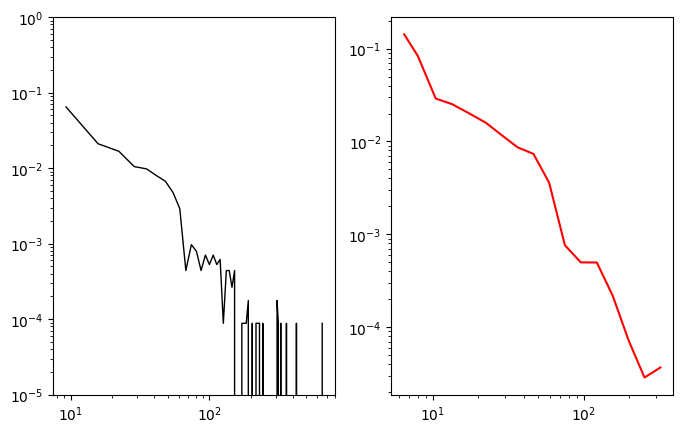

In [36]:
# subcritical
def compute_spike_count(X):
    """
    Args:
        X: (np.array): spike train

    Returns:

    """
    window = 1
    n = X.shape[0] // window
    return np.sum(X[:n*window].reshape([n, -1]), axis=1)
_, aval_size, aval_dur, _ = compute_avalanche(sub_spike, threshold=6)
threshold = np.median(np.sum(sub_spike, axis=1)) / 2
print("threshold," ,threshold)
hist, edges = np.histogram(aval_size, bins=100, density=True)
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 2, 1)
ax.plot((edges[:-1]+edges[1:])/2, hist, "k", lw=1)
ax.set_ylim([1e-5, 1])
ax.set_xscale('log')
ax.set_yscale('log')
ax = fig.add_subplot(1, 2, 2)
fit = powerlaw.Fit(aval_size, xmin=aval_size.min(), xmax=400)
fit.plot_pdf(ax=ax, original_data=False,  c="r")

threshold, 0.0


<AxesSubplot:>

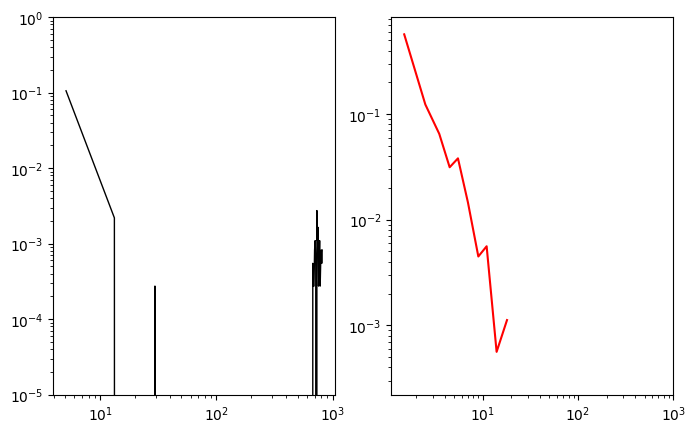

In [41]:
def compute_spike_count(X):
    """
    Args:
        X: (np.array): spike train

    Returns:

    """
    window = 1
    n = X.shape[0] // window
    return np.sum(X[:n*window].reshape([n, -1]), axis=1)
_, aval_size, aval_dur, _ = compute_avalanche(super_spike, threshold=1)
threshold = np.median(compute_spike_count(super_spike)) / 2
print("threshold," ,threshold)
hist, edges = np.histogram(aval_size, bins=100, density=True)
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 2, 1)
ax.plot((edges[:-1]+edges[1:])/2, hist, "k", lw=1)
ax.set_ylim([1e-5, 1])
ax.set_xscale('log')
ax.set_yscale('log')
ax = fig.add_subplot(1, 2, 2)
fit = powerlaw.Fit(aval_size, xmin=aval_size.min(), xmax=aval_size.max())
fit.plot_pdf(ax=ax, original_data=True,  c="r")